In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC critico.csv'
fr = pd.read_csv(FILE)

In [3]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (Volt)'])
sigmaV = 0.04 / np.sqrt(12)

C =  104.7* 10**-9 # ± 0.3)e-9 F
sigmaC = 0.3 * 10**-9 # F

R = 1760 #ohm
sigmaR = 10 # Ohm

L = 83.9 * 10**-3 #Hr
sigmaL = 0.3* 10**-3 #Hr

R_L = 58.5 #ohm 1%
Vg = 4 #Volt

w2 = 1 / (L*C)
sigmaw2 = np.abs(1/(L*C))*np.sqrt((sigmaL/L)**2 + (sigmaC/C)**2)

γ = R / (2*L)
dγ_dR = 1 / (2 * L)
dγ_dL = -R / (2 * L**2)
sigmaγ = np.sqrt((dγ_dR * sigmaR)**2 + (dγ_dL * sigmaL)**2)

β = np.sqrt(w2 - γ**2)
dβ_dw = 0.5 / np.sqrt(w2 - γ**2)
dβ_dγ = -γ / np.sqrt(w2 - γ**2)
sigmaβ = np.sqrt((dβ_dw * sigmaw2)**2 + (dβ_dγ * sigmaγ)**2)

In [7]:
def VR_critico(t,A,γ):
    return A * t * np.exp(-γ*t)

def VR_sottosmorzato(t,V0,γ,β):
    return V0*np.exp(-γ*t)*np.sin(β*t)

def VR_sovrasmorzato(t,V0,γ,β):
    return V0 * np.exp(-γ*t) * (np.exp(β*t) - np.exp(-β*t))

In [21]:
ic = Interpolazione(t,V,VR_critico,sigmaV,p0=[Vg,γ])
ist = Interpolazione(t,V,VR_sottosmorzato,sigmaV,p0=[Vg,γ,β])
# sv = Interpolazione(t,V,VR_sovrasmorzato,sigmaV,p0=[Vg,γ,β]) # NOTA: NON TROVA PARAMETRI OTTIMALI PER DESCRIVERE IL SOVRASMIRZATO

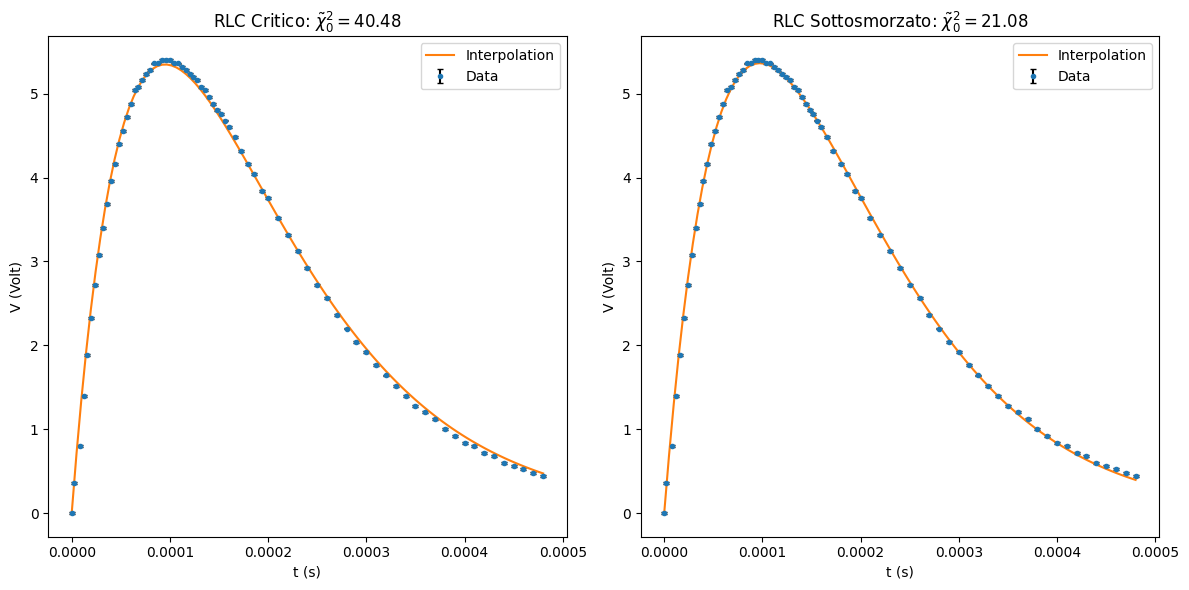

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the left subplot
ax1.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data',ecolor='black',capsize=2)
ax1.plot(ic.x_best, ic.y_best, label='Interpolation')
ax1.set_xlabel('t (s)')
ax1.set_ylabel('V (Volt)')
ax1.set_title('RLC Critico: $\\tilde{\chi}^2_0=$' + f"{ic.rchisquare}")
ax1.legend()

# Plot on the right subplot
ax2.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data',ecolor='black',capsize=2)
ax2.plot(ist.x_best, ist.y_best, label='Interpolation')
ax2.set_xlabel('t (s)')
ax2.set_ylabel('V (Volt)')
ax2.set_title('RLC Sottosmorzato: $\\tilde{\chi}^2_0=$' + f"{ist.rchisquare}")
ax2.legend()

plt.tight_layout()
plt.show()


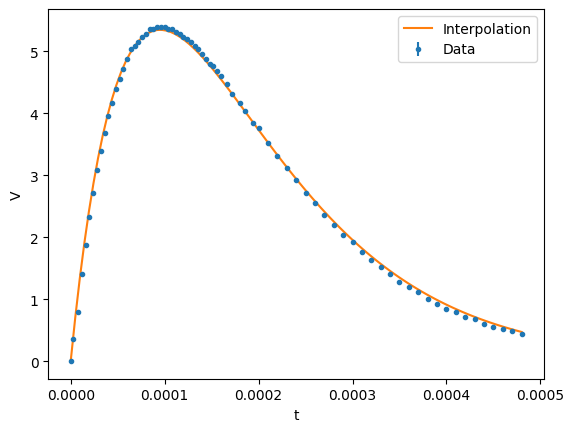

In [16]:
plt.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data')
plt.plot(ic.x_best, ic.y_best, label='Interpolation')
plt.xlabel('t')
plt.ylabel('V') # TODO: fit con diversi modelli
plt.legend()
plt.show()